# Problem Statement
Problem Statement: In the rapidly evolving world of eCommerce, accurate product categorization is crucial for ensuring seamless customer experiences, reducing search friction, and increasing product discoverability. However, the sheer volume of diverse products poses a significant challenge. Current classification systems struggle to handle ambiguities, unconventional naming conventions, and multi-language data. This hackathon aims to address these challenges by inviting participants to create innovative solutions that enhance product categorization efficiency, accuracy, and scalability.
Develop a text classification model that categorizes products with maximum accuracy based on description of the product.



# List of Tasks

# Objectives: 
This hackathon focuses on creating accurate and efficient solutions for eCommerce product categorization. The key objectives are:

1. Data Exploration and Preparation:
   - Explore and analyze the dataset to understand key features, detect missing data, and identify ambiguities.
   - Preprocess the dataset for consistency, noise reduction, and missing value handling.

2. Descriptive Analysis:
   - Perform descriptive analysis to identify data patterns, category distributions, and inconsistencies, especially for text data.
   - Visualize data insights using word cloud and other text viz techniques. 

3. Feature Engineering/Text to Features:
   - Transform raw product data into informative features suitable for machine learning models.
   - Convert text descriptions into numerical features using techniques such as TF-IDF, word embeddings, or custom methods.

4. Predictive Modeling:
   - Design and develop machine learning models using text data for accurate product categorization.
   - Consider classification, clustering, or hybrid models based on problem requirements.
   - Ensure the model can handle ambiguous products 

5. Fine Tuning:
   - Optimize models by tuning hyperparameters and selecting relevant features.
   - Evaluate and compare models using metrics such as accuracy, F1 score, precision, and recall.
   - Validate models through cross-validation or a separate test dataset.

6. Enhance Categorization Accuracy:
   - Improve model accuracy by incorporating domain-specific knowledge or ensemble methods.
   - Ensure solutions can accurately categorize unconventional product names and handle ambiguities.
   - Develop models that support scalable, real-time categorization.


# Importing Required Libraries

In [1]:
#import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import re
import spacy

# Analysing the Given Dataset 

In [2]:
# Load the dataset
url = 'train_product_data.csv'
data = pd.read_csv(url)

In [3]:
data.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3  ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4  29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
2  http://www.flipkart.com/alisha-solid-women-s-c...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/dilli-bazaaar-bellies-...   

                                        product_name product_category_tree  \
0                Alisha Solid Women's Cycling Shorts             Clothing    
1                                         AW Bellies             Footwear    
2                Alisha Solid Women's Cycling Shorts             Clothing    
3                Alisha Solid Women's Cycling Shorts             Clothing    
4  dilli bazaaar Bellies, Corporate Casuals, Casuals             Footwear    

                pid  retail_price  discounted_price  \
0  SRTEH2FF9KEDEFGF         999.0             379.0   
1  SHOEH4GRSUBJGZXE         999.0             499.0   
2  SRTEH2F6HUZMQ6SJ         699.0             267.0   
3  SRTEH2FVVKRBAXHB        1199.0             479.0   
4  SHOEH3DZBFR88SCK         699.0             349.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
2  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
3  ["http://img6a.flixcart.com/image/short/p/j/z/...                    False   
4  ["http://img6a.flixcart.com/image/shoe/b/p/n/p...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
2  Key Features of Alisha Solid Women's Cycling S...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Key Features of dilli bazaaar Bellies, Corpora...  No rating available   

        overall_rating          brand  \
0  No rating available         Alisha   
1  No rating available             AW   
2  No rating available         Alisha   
3  No rating available         Alisha   
4  No rating available  dilli bazaaar   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Ideal For"...  
2  {"product_specification"=>[{"key"=>"Number of ...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Occasion",...

In [4]:
data.tail()

uniq_id            crawl_timestamp  \
14994  abda697c6da997f66c78d91d6c88078c  2015-12-20 08:26:17 +0000   
14995  87bcdd46bb48bfc1045d7ee84aef7b7a  2015-12-20 08:26:17 +0000   
14996  b4fad612a9f72f1ffd10134f9be7cfe8  2015-12-20 08:26:17 +0000   
14997  1336909e5468b63c9b1281350eba647d  2015-12-20 08:26:17 +0000   
14998  d6eff0e0c938cc39c4451083994a2227  2015-12-20 08:26:17 +0000   

                                             product_url  \
14994  http://www.flipkart.com/thelostpuppy-back-cove...   
14995  http://www.flipkart.com/kenway-retail-brass-co...   
14996  http://www.flipkart.com/thelostpuppy-back-cove...   
14997  http://www.flipkart.com/kenway-retail-brass-co...   
14998  http://www.flipkart.com/kenway-retail-brass-co...   

                                       product_name   product_category_tree  \
14994    TheLostPuppy Back Cover for Apple iPad Air  Mobiles & Accessories    
14995               Kenway Retail Brass Copper Cuff              Jewellery    
14996  TheLostPuppy Back Cover for Apple iPad Air 2  Mobiles & Accessories    
14997               Kenway Retail Brass Copper Cuff              Jewellery    
14998               Kenway Retail Brass Copper Cuff              Jewellery    

                    pid  retail_price  discounted_price  \
14994  ACCE9ZY9K4BHVYNA        2199.0             599.0   
14995  BBAEA49HNDNQYGJU         529.0             295.0   
14996  ACCE9Z2HKHDGH7JY        2199.0             599.0   
14997  BBAEA49HHKJTPHWV         547.0             322.0   
14998  BBAEA49HQKRYCR4Z         529.0             295.0   

                                                   image  \
14994  ["http://img6a.flixcart.com/image/cases-covers...   
14995  ["http://img5a.flixcart.com/image/bangle-brace...   
14996  ["http://img5a.flixcart.com/image/cases-covers...   
14997  ["http://img5a.flixcart.com/image/bangle-brace...   
14998  ["http://img5a.flixcart.com/image/bangle-brace...   

       is_FK_Advantage_product  \
14994                    False   
14995                    False   
14996                    False   
14997                    False   
14998                    False   

                                             description       product_rating  \
14994  TheLostPuppy Back Cover for Apple iPad Air (Mu...  No rating available   
14995  Kenway Retail Brass Copper Cuff\n             ...  No rating available   
14996  TheLostPuppy Back Cover for Apple iPad Air 2 (...  No rating available   
14997  Kenway Retail Brass Copper Cuff\n             ...  No rating available   
14998  Kenway Retail Brass Copper Cuff\n             ...  No rating available   

            overall_rating          brand  \
14994  No rating available   TheLostPuppy   
14995  No rating available  Kenway Retail   
14996  No rating available   TheLostPuppy   
14997  No rating available  Kenway Retail   
14998  No rating available  Kenway Retail   

                                  product_specifications  
14994  {"product_specification"=>[{"key"=>"Brand", "v...  
14995  {"product_specification"=>[{"key"=>"Collection...  
14996  {"product_specification"=>[{"key"=>"Brand", "v...  
14997  {"product_specification"=>[{"key"=>"Collection...  
14998  {"product_specification"=>[{"key"=>"Collection...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [6]:
# Analysing Statistics
data.describe()

retail_price  discounted_price
count   14942.000000      14942.000000
mean     3128.424040       2087.732298
std      9154.463342       7712.247869
min        35.000000         35.000000
25%       699.000000        349.000000
50%      1000.000000        499.000000
75%      1989.750000        999.000000
max    571230.000000     571230.000000

In [7]:
#Check the Rows and columns
data.shape

(14999, 15)

In [8]:
# Checking for the missing values 
missing_values = data.isnull().sum()
print(missing_values)

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64


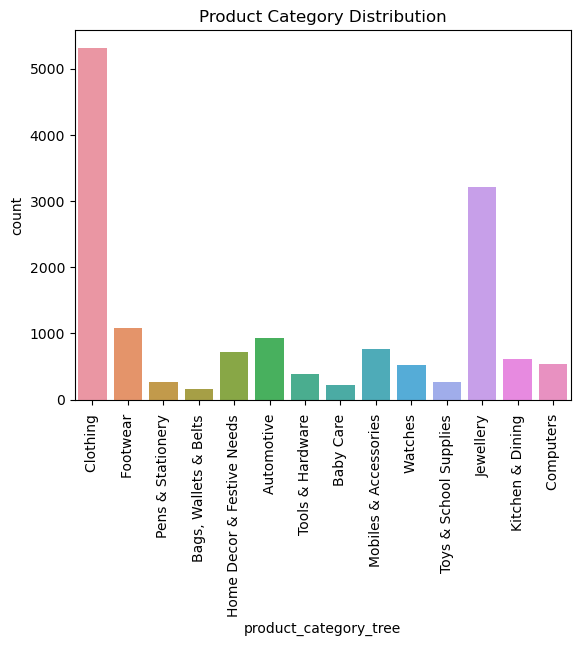

In [9]:
# Visualizing Category Distribution 
sns.countplot(x='product_category_tree', data=data)
# X-axis Lables rotation 
plt.tick_params(axis='x', rotation=90)  
plt.title('Product Category Distribution')
plt.show()

In [10]:
# Analysing only dependent and independent columns
xaxis=['product_category_tree','description']

In [11]:
data1=data[xaxis]
data1.head()

product_category_tree                                        description
0             Clothing   Key Features of Alisha Solid Women's Cycling S...
1             Footwear   Key Features of AW Bellies Sandals Wedges Heel...
2             Clothing   Key Features of Alisha Solid Women's Cycling S...
3             Clothing   Key Features of Alisha Solid Women's Cycling S...
4             Footwear   Key Features of dilli bazaaar Bellies, Corpora...

# EDA -Exploratory Data Analysis

In [12]:
#checking for null values
data1.isnull().sum()

product_category_tree    0
description              1
dtype: int64

In [13]:
# Dropping null values

data1.dropna(inplace=True)

In [14]:
data1.isnull().sum()

product_category_tree    0
description              0
dtype: int64

In [15]:
# printing the rows and columns after dealing with null values
data1.shape

(14998, 2)

In [16]:
data1.describe()

product_category_tree  \
count                  14998   
unique                    14   
top                Clothing    
freq                    5315   

                                              description  
count                                               14998  
unique                                              13163  
top     Fashion Jewellery Alloy Necklace - Buy Fashion...  
freq                                                   38

# Data Visualization

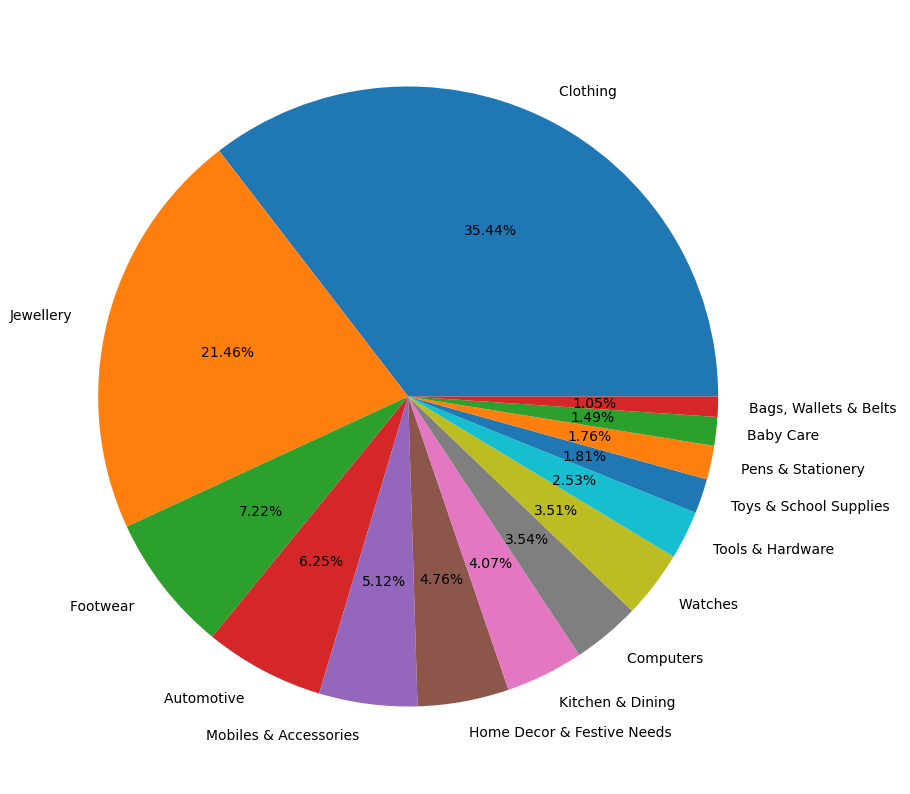

In [17]:
#visualising the imblance data 
plt.figure(figsize=(10,12))
plt.pie(data1['product_category_tree'].value_counts(),labels=data1['product_category_tree'].value_counts().index,autopct='%1.2f%%')
plt.show()

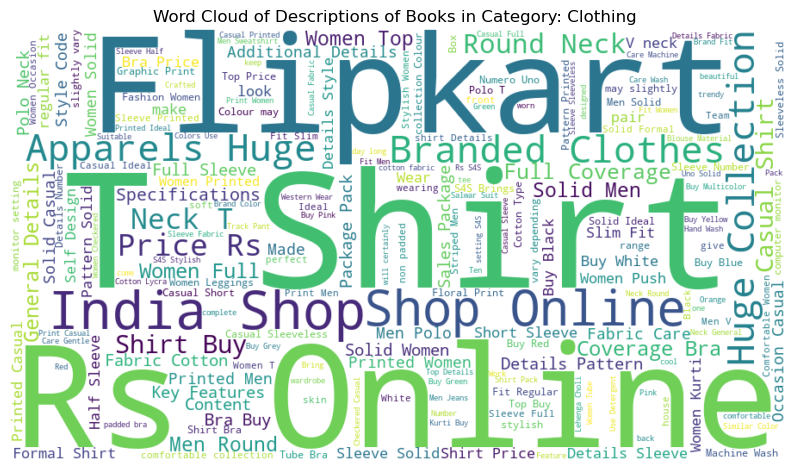

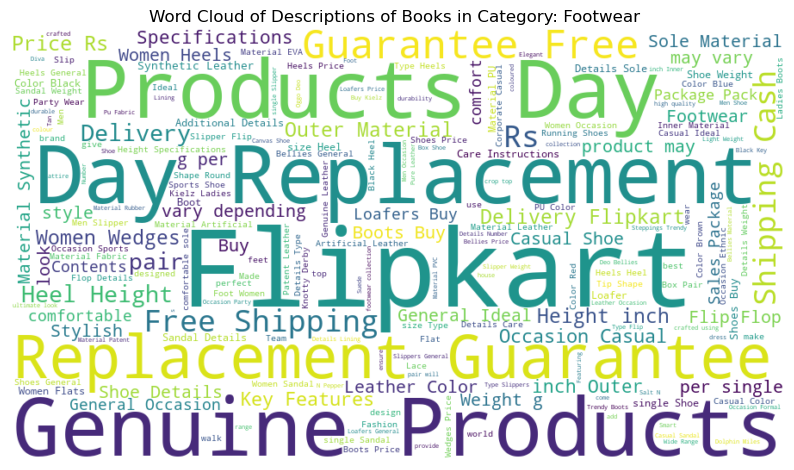

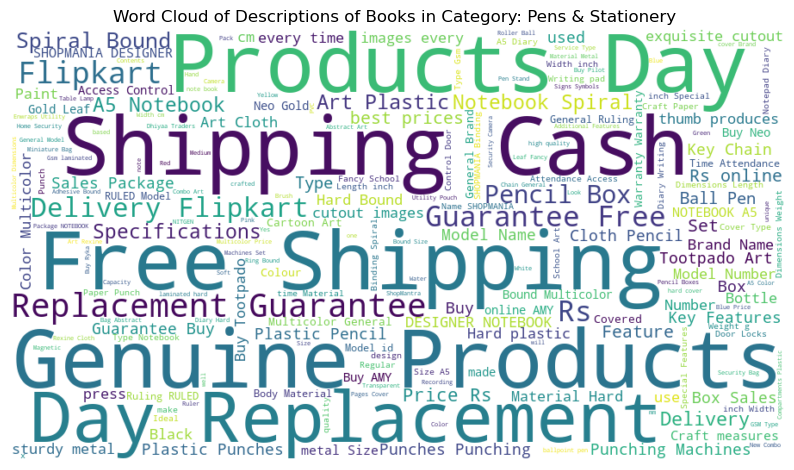

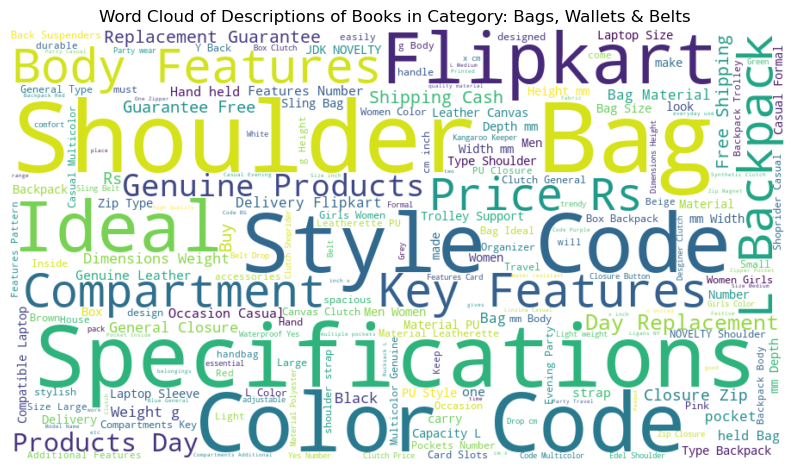

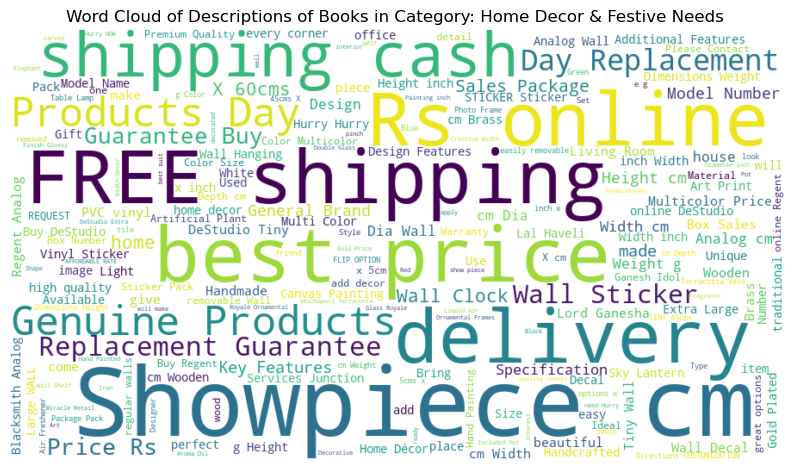

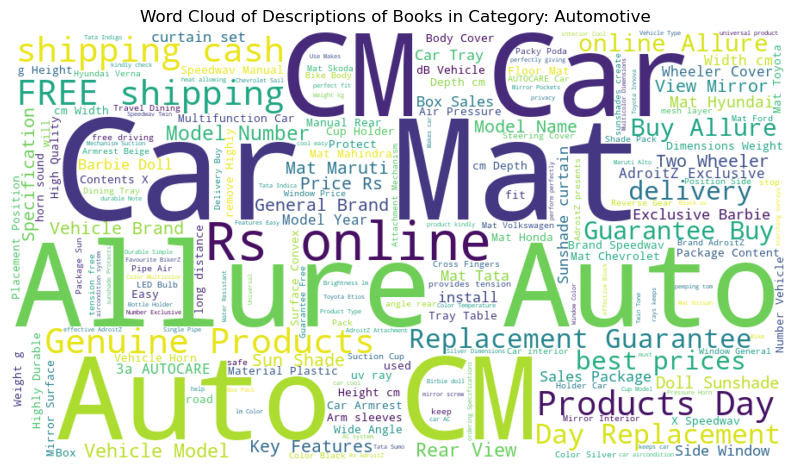

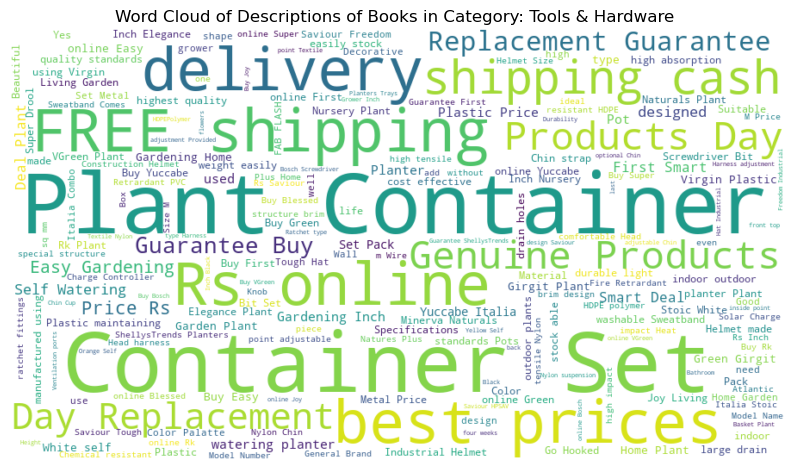

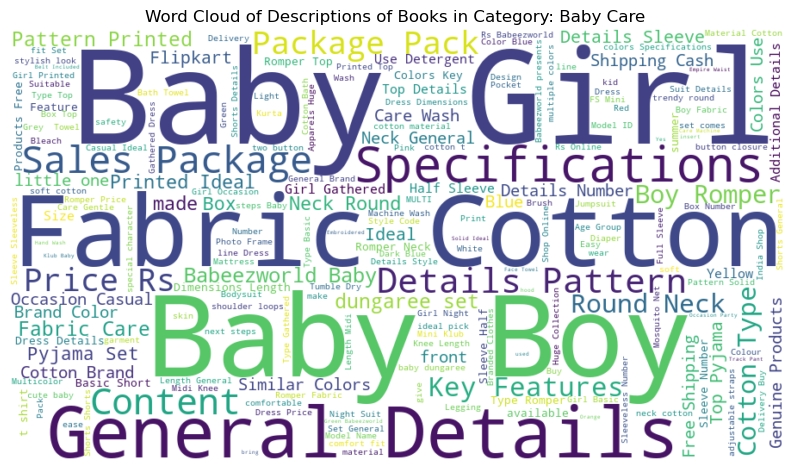

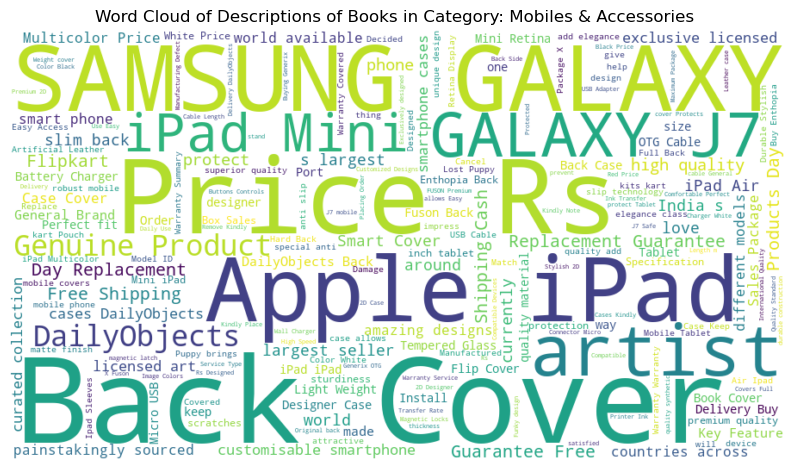

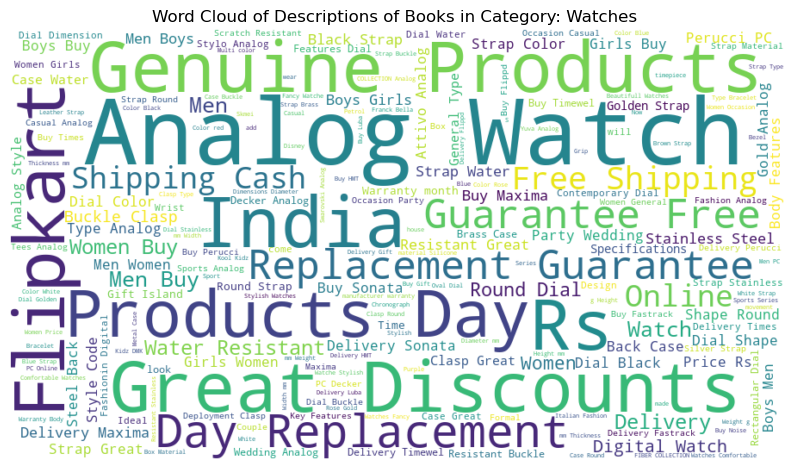

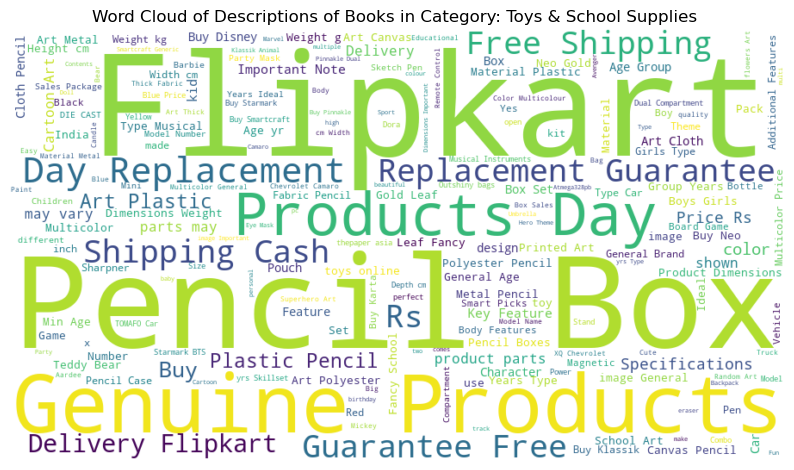

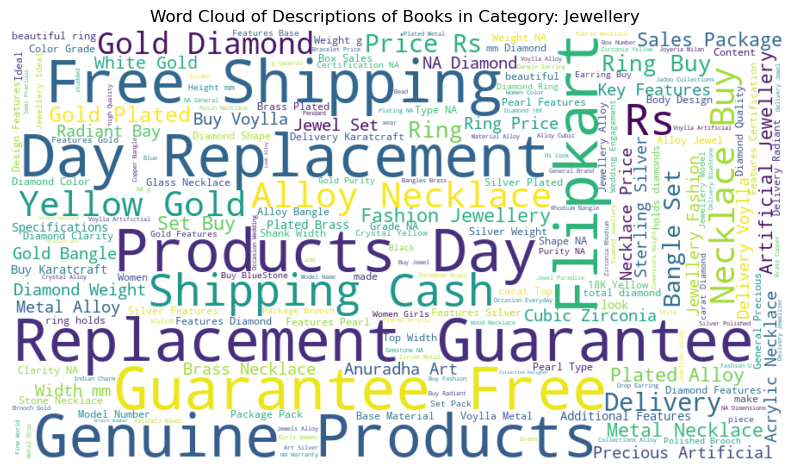

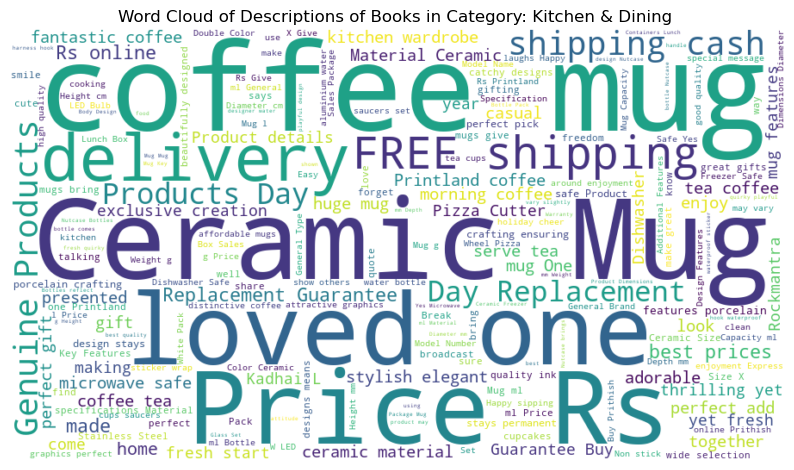

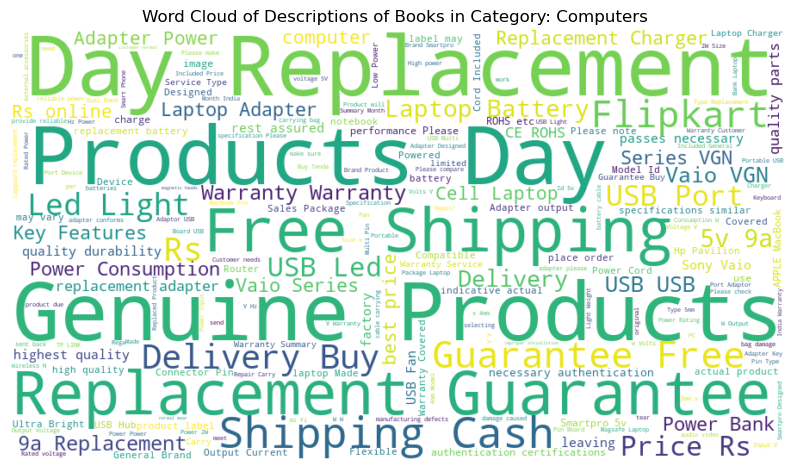

In [18]:
# Assuming 'catg' is a list of unique product categories
catg = data1['product_category_tree'].unique()

for i in catg:
    # Word cloud for book descriptions in each category
    all_text = ' '.join(data1[data1['product_category_tree'] == i]['description'])
    wordcloud = WordCloud(width=900, height=500, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of Descriptions of Books in Category: {i}')
    plt.axis('off')
    plt.show()

# Data Preprocessing -Cleaning the data

In [19]:
import re
import spacy

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    """
    Clean and preprocess text using spaCy and regular expressions.

    Parameters:
    text (str): The input text to be cleaned.

    Returns:
    str: The cleaned and preprocessed text.
    """
    # Converting to lowercase
    text = text.lower()

    # Removing special characters
    text = re.sub(r'(?<!\b)[^a-z\s]', '', text)

    # Handling empty strings
    if not text.strip():
        return ''

    # Using spaCy to lemmatize, remove stop words, and punctuations
    doc = nlp(text)
    tokens = []
    for token in doc:
      if not token.is_stop and not token.is_punct:
        tokens.append(token.lemma_)
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [20]:
# Applying clean text to the description
data1['description']=data1['description'].apply(clean_text)

In [21]:
# printing the description column after clean
data1.head()

product_category_tree                                        description
0             Clothing   key feature alisha solid woman cycling short c...
1             Footwear   key feature aw belly sandal wedge heel casual ...
2             Clothing   key feature alisha solid woman cycling short c...
3             Clothing   key feature alisha solid woman cycling short c...
4             Footwear   key feature dilli bazaaar belly corporate casu...

# Encoding
Here we are encoding the categorical data into numerical data using sklearn labelEncoder function

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data1['product_category_tree']=label_encoder.fit_transform(data1['product_category_tree'])

data1['product_category_tree'].value_counts()
opn=open('label_encoder1.pkl','wb')
pickle.dump(label_encoder,opn)
opn.close()

# Feature Engineering / Text to Features:

Split the dataset into dependent and Independent Features


### Convert text to numerical representation using TF-IDF

In [25]:
# Convert text to numerical representation using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data1['description'])
y = data1['product_category_tree']

In [26]:
X.shape

(14998, 13880)

# Analysing Imbalance Classes

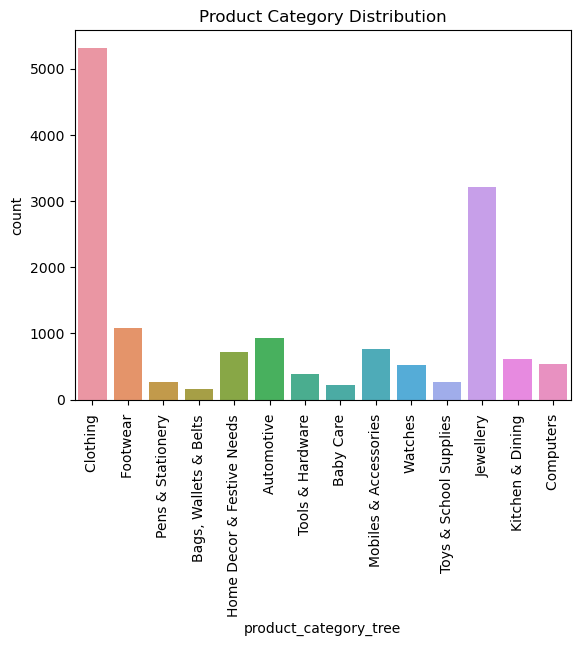

In [27]:
# Visualizing imblance data
sns.countplot(x='product_category_tree', data=data)

# X-axis Lables rotation 
plt.tick_params(axis='x', rotation=90)  
plt.title('Product Category Distribution')
plt.show()

### Analysis 
From the above graph we can find category clothing and jewellery have the high propotion 
Categories such as Bags, Wallets & Belts and Baby Care have much lower proportions, indicating they are underrepresented.So its clear that imblance data can have high impact on machine learning model

## Split the data into training and testing sets

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (11998, 13880)
Testing set shape: (3000, 13880)


## SMOTE Handling Imbalance dataset

In [29]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Develop Machine Learning- Multi-class text classifier:

# Model 1 Logistic Regression

In [30]:
#logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate the model
y_pred = model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       0.85      0.88      0.87        51
           2       0.91      0.97      0.94        31
           3       0.99      0.99      0.99      1083
           4       0.96      0.95      0.96       107
           5       1.00      0.99      0.99       220
           6       0.98      0.99      0.98       154
           7       1.00      1.00      1.00       608
           8       0.96      0.97      0.97       114
           9       0.97      0.97      0.97       171
          10       0.84      0.90      0.87        41
          11       0.99      0.99      0.99        79
          12       0.86      0.79      0.83        48
          13       1.00      1.00      1.00        95

    accuracy                           0.98      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.98      0.98      0.98      3000



# Hyper parameter Tuning

In [ ]:

from sklearn.model_selection import GridSearchCV
# Defining parameter grid for 
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

In [ ]:
#best_model
best_model = LogisticRegression(max_iter=1000, C=10, solver='lbfgs')
best_model.fit(X_train, y_train)

In [ ]:
# Generating Classification report

# Predict and evaluate
y_pred = best_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


In [ ]:
#Analysing f1 Score
f1_score=metrics.f1_score(y_test,y_pred,average='weighted')
print("Logistic regression f1_score :",f1_score)

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
op=open('model_logistic_nlp.pkl','wb')
pickle.dump(best_model,op)
op.close()

# Model 2 Decision tree

In [ ]:
# Train model
model = DecisionTreeClassifier()
model.fit(X_train_balanced, y_train_balanced)

In [ ]:
# Pridict and evaluate model
y_pred = model.predict(X_test)

# generating Classification report 
print(classification_report(y_test, y_pred))

In [ ]:
#analysing f1 score
f1_score=metrics.f1_score(y_test,y_pred,average='weighted')
print("Decision tree f1_score :",f1_score)

In [ ]:
#Confusion matrics for decision tree
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model 3 Random forest model

In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
# analysing f1 score
f1_score=metrics.f1_score(y_test,y_pred,average='weighted')
print("Random forest f1_score :",f1_score)

In [ ]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model 4 Naive Bayes 

In [ ]:
#import MultinomiaNB from Naive bayes
from sklearn.naive_bayes import MultinomialNB


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

#classification report generation
print(classification_report(y_test, y_pred))

# Model 5 SVC

In [ ]:
#impot SVC
from sklearn.svm import SVC

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the SVM model
model = SVC(kernel='linear')  
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Comparing all the above models 

In [ ]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
    
}

In [ ]:
# Initialize lists for storing results
model_names = []
conf_matrices = []
class_reports = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_names.append(name)
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred, output_dict=True))

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, (name, cm) in enumerate(zip(model_names, conf_matrices)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], 
                cbar=False, xticklabels=['Negative', 'Neutral', 'Positive'], 
                yticklabels=['Negative', 'Neutral', 'Positive'])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Remove the empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Print classification reports
for name, report in zip(model_names, class_reports):
    print(f"Model: {name}")
    print("Classification Report:")
    print(pd.DataFrame(report).transpose())
    print("-" * 50)

# Deep learning model

# Import Libraries for deep learning model for data manipulation, model building and evaluation
Sequential 
Embedding
Dense
LSTM
Dropout
Bidirectional from TensorFlow
Tokenizer and pad_sequences for text preprocessing
Keras for building the neural network



In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
# Load the dataset
url = 'train_product_data.csv'
data = pd.read_csv(url)

In [36]:
data.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3  ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4  29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
2  http://www.flipkart.com/alisha-solid-women-s-c...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/dilli-bazaaar-bellies-...   

                                        product_name product_category_tree  \
0                Alisha Solid Women's Cycling Shorts             Clothing    
1                                         AW Bellies             Footwear    
2                Alisha Solid Women's Cycling Shorts             Clothing    
3                Alisha Solid Women's Cycling Shorts             Clothing    
4  dilli bazaaar Bellies, Corporate Casuals, Casuals             Footwear    

                pid  retail_price  discounted_price  \
0  SRTEH2FF9KEDEFGF         999.0             379.0   
1  SHOEH4GRSUBJGZXE         999.0             499.0   
2  SRTEH2F6HUZMQ6SJ         699.0             267.0   
3  SRTEH2FVVKRBAXHB        1199.0             479.0   
4  SHOEH3DZBFR88SCK         699.0             349.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
2  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
3  ["http://img6a.flixcart.com/image/short/p/j/z/...                    False   
4  ["http://img6a.flixcart.com/image/shoe/b/p/n/p...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
2  Key Features of Alisha Solid Women's Cycling S...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Key Features of dilli bazaaar Bellies, Corpora...  No rating available   

        overall_rating          brand  \
0  No rating available         Alisha   
1  No rating available             AW   
2  No rating available         Alisha   
3  No rating available         Alisha   
4  No rating available  dilli bazaaar   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Ideal For"...  
2  {"product_specification"=>[{"key"=>"Number of ...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Occasion",...

# Cleaning Data 

In [37]:
# Remove missing values
data1.dropna(subset=['description', 'product_category_tree'], inplace=True)

# Removing duplicates
data1.drop_duplicates(subset=['description'], inplace=True)

# normalization of text
data1['description'] = data1['description'].str.lower().str.replace('[^\w\s]', '')

## Tokenization and Padding:

* Convert text to sequences of integers.
* Pad sequences to ensure uniform input size

In [38]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as required
tokenizer.fit_on_texts(data1['description'])
X = tokenizer.texts_to_sequences(data1['description'])
X = pad_sequences(X, maxlen=100)  # Adjust maxlen as required
op=open('tokenizer_nlp.pkl','wb')
pickle.dump(tokenizer,op)
op.close()


# Label Encoding
convert the categorical data into numerical 

In [40]:
#  df1 is  DataFrame and 'product_category_tree' is the column we're encoding
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the specified column
y = label_encoder.fit_transform(data1['product_category_tree'])

# Save the fitted LabelEncoder to a file using pickle
with open('label_encoder2.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Appling SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# model bulding

In [59]:
model_deep=Sequential()
model_deep.add(Embedding(input_dim=10000,output_dim=128))
model_deep.add(Bidirectional(LSTM(64)))
model_deep.add(Dropout(0.5))
model_deep.add(Dense(64,activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Dense(len(label_encoder.classes_),activation='softmax'))

Sequential():
* This initializes a linear stack of layers. You can add layers to the model one by one. The output of one layer will be the input to the next layer.

## Embedding Layer

**Embedding():** This layer is used for turning positive integers (indexes) into dense vectors of fixed size. It's often used as the first layer in a model dealing with text data.

### Parameters

- **input_dim=10000:** The size of the vocabulary. In this case, it means we have 10,000 unique words in our vocabulary.
- **output_dim=128:** The size of the dense embedding vectors. Each word will be represented as a 128-dimensional vector.
- **input_length=100:** The length of input sequences. Each input sequence will be padded/truncated to this length.


## Bidirectional Wrapper

**Bidirectional():** This wrapper allows an RNN (like LSTM or GRU) to learn information from both the past and future by processing the input sequence in both forward and backward directions.

### Parameters

- **LSTM(64):** An LSTM (Long Short-Term Memory) layer with 64 units. LSTMs are a type of recurrent neural network (RNN) that can learn long-term dependencies. Using LSTM inside Bidirectional means we have one LSTM layer processing the sequence forward and another processing it backward, and their outputs are concatenated.


## Dropout Layer

**Dropout(0.5):** Dropout is a regularization technique used to prevent overfitting. It randomly sets a fraction of the input units to 0 at each update during training time, which helps in making the model robust. The fraction (0.5) means that 50% of the input units are set to 0.

## Dense Layer

**Dense(64):** A fully connected (dense) layer with 64 units. Each unit receives input from all units of the previous layer.

**activation='relu':** The ReLU (Rectified Linear Unit) activation function. It introduces non-linearity to the model, allowing it to learn more complex patterns. ReLU outputs 0 if the input is negative, and outputs the input itself if the input is positive.


**Dropout(0.5)**: Another dropout layer with a dropout rate of 50%. This helps further in reducing overfitting.

## Output Layer

**Dense(len(label_encoder.classes_)):** A dense layer with a number of units equal to the number of unique classes in your target variable (as given by `label_encoder.classes_`). This layer represents the output of the model.

**activation='softmax':** The softmax activation function. It is used in the output layer of a classification model to output a probability distribution over the classes. Each unit will output a probability value, and all these values will sum to 1, which allows the model to predict the class probabilities for the given input.


In [44]:
model_deep.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model_deep.fit(X_train_balanced,y_train_balanced,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 63s 35ms/step - accuracy: 0.3710 - loss: 1.8569 - val_accuracy: 0.8903 - val_loss: 0.3752
Epoch 2/10
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6445 - loss: 1.0848 - val_accuracy: 0.9311 - val_loss: 0.2360
Epoch 3/10
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6945 - loss: 0.9321 - val_accuracy: 0.9348 - val_loss: 0.2215
Epoch 4/10
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7368 - loss: 0.7974 - val_accuracy: 0.9381 - val_loss: 0.2256
Epoch 5/10
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7688 - loss: 0.7059 - val_accuracy: 0.9257 - val_loss: 0.2845
Epoch 6/10
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7881 - loss: 0.6578 - val_accuracy: 0.9451 - val_loss: 0.2499
Epoch 7/10
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8154 - loss: 0.5774 - val_accuracy: 0.9373 - val_loss: 0.2992
Epoch 8/10
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8371 -

In [47]:
# test the model prediction
y_pred=model_deep.predict(X_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [46]:
# test the model prediction
y_pred=model_deep.predict(X_test)

# y_test are the true labels and y_pred are the predicted labels (probabilities)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with highest probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy: 0.9422442244224423


In [60]:
# test the model prediction
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the F1 score


f1 = f1_score(y_test, y_pred_labels, average='weighted') # Use the imported f1_score function
print("Deep Learning Model F1-score:", f1)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Deep Learning Model F1-score: 0.9446240231231751


In [49]:
# dump the model into a pkl file
op=open('model_deep_nlp1.pkl','wb')
pickle.dump(model_deep,op)
op.close()

# Load the test data excel file 

In [50]:
data_x=pd.read_excel('test_data.xlsx')
data_x.head()

uniq_id            crawl_timestamp  \
0  4fb99d98225f415e7ece96938e95628f  2015-12-20 08:26:17 +0000   
1  4ea284c8d38b2ea97a1c2a26f34e057c  2015-12-20 08:26:17 +0000   
2  ee6ce2c7045c54257e2a0b590e09c296  2015-12-20 08:26:17 +0000   
3  e797ba3b5f2e2d1fdc520e48486ab60e  2015-12-20 08:26:17 +0000   
4  f4d8d43858c8858c68d75ce07ac641c0  2015-12-20 08:26:17 +0000   

                                         product_url  \
0  http://www.flipkart.com/v-v-art-brass-bracelet...   
1  http://www.flipkart.com/kalpaveda-copper-cuff/...   
2  http://www.flipkart.com/thelostpuppy-book-cove...   
3  http://www.flipkart.com/riana-copper-bangle/p/...   
4  http://www.flipkart.com/inox-jewelry-stainless...   

                                 product_name               pid  retail_price  \
0                      V&V ART Brass Bracelet  BBAE6NYHCDTEZJTB         470.0   
1                Kalpaveda Copper Copper Cuff  BBAEDFFKZJTY7SZZ        1200.0   
2  Thelostpuppy Book Cover for Apple iPad Air  ACCEA4DZH6M5SFVH        2199.0   
3                  Riana Copper Copper Bangle  BBAEAXFQHHMF3EYZ        2499.0   
4           Inox Jewelry Stainless Steel Cuff  BBAECH63WYDG6TE2        1629.0   

   discounted_price                                              image  \
0             423.0  ["http://img6a.flixcart.com/image/bangle-brace...   
1            1200.0  ["http://img6a.flixcart.com/image/bangle-brace...   
2             599.0  ["http://img5a.flixcart.com/image/cases-covers...   
3             649.0  ["http://img5a.flixcart.com/image/bangle-brace...   
4            1222.0  ["http://img6a.flixcart.com/image/bangle-brace...   

   is_FK_Advantage_product                                        description  \
0                    False  V&V ART Brass Bracelet - Buy V&V ART Brass Bra...   
1                    False  Kalpaveda Copper Copper Cuff\n                ...   
2                    False  Thelostpuppy Book Cover for Apple iPad Air (Mu...   
3                    False  Riana Copper Copper Bangle - Buy Riana Copper ...   
4                    False  Inox Jewelry Stainless Steel Cuff\n           ...   

        product_rating       overall_rating         brand  \
0  No rating available  No rating available       V&V ART   
1  No rating available  No rating available     Kalpaveda   
2  No rating available  No rating available  Thelostpuppy   
3                    5                    5         Riana   
4  No rating available  No rating available  Inox Jewelry   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Stretchabl...  
2  {"product_specification"=>[{"key"=>"Brand", "v...  
3  {"product_specification"=>[{"key"=>"Collection...  
4  {"product_specification"=>[{"key"=>"Stretchabl...

In [52]:
# Text normalization
data_x['description'] = data_x['description'].str.lower().str.replace('[^\w\s]', '')


In [54]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(data_x['description'])
X = tokenizer.texts_to_sequences(data_x['description'])
X = pad_sequences(X, maxlen=100)  # Adjust maxlen as needed

In [55]:
# import the nlp model here
model=pickle.load(open('model_deep_nlp1.pkl','rb'))
y_pred=model.predict(X)

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [56]:
op=open('label_encoder2.pkl','rb')
label_encoder=pickle.load(op)
op.close()

In [57]:
# test the model prediction
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Print predicted categories
predicted_categories = label_encoder.inverse_transform(y_pred_labels)
print('Predicted Categories (Real Names):', predicted_categories)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted Categories (Real Names): [13  7  9 ...  7  7 13]


In [58]:
result = pd.DataFrame(predicted_categories, columns=['predict_category'])
result.head()

predict_category
0                13
1                 7
2                 9
3                 3
4                 3